### Imports

In [50]:
import numpy as np

### Install Cirq

In [51]:
try:
  import cirq
except ImportError:
  print("Installing Cirq...")
  !pip install --quiet cirq
  import cirq

  print("Cirq is now installed.")

### Helper Functions

In [52]:
def norm(vector):
  return np.linalg.norm(vector, 2)

def frobenius_norm(matrix):
  return np.linalg.norm(matrix, 'fro')

def ket(i, m):
  return [1 if j == i else 0 for j in range(m)]

### $R_i$ Gate

In [53]:
class R(cirq.Gate):
  def __init__(self, i, t):
    super(R, self)
    self.i = i
    self.t = t

  def _num_qubits_(self):
    d = len(t)
    return ceil(log2(d))

  def _unitary_(self):
    t_i = [self.t[self.i]]
    I = np.eye(len(t_i))
    return I - (2 * np.outer(t_i, t_i))

  def _circuit_diagram_info_(self, args):
    return f"R{self.i}"

### Input

In [54]:
zero_state = [1, 0]
plus_state = [2**(-0.5), 2**(-0.5)]

A = [zero_state, plus_state]
print(f"A = {A}")

print()

m = len(zero_state)
d = len(A)

print(f"m = {m}")
print(f"d = {d}")

print()

A_F = frobenius_norm(A)
print(f"|A|_F = {A_F}")


A = [[1, 0], [0.7071067811865476, 0.7071067811865476]]

m = 2
d = 2

|A|_F = 1.4142135623730951


### $V_A$

In [55]:
V_A = []

# Resize it to the correct shape and fill with 0s.
for i in range(m):
  V_A.append(0)

for i in range(m):
  print(f"A_{i} = {A[i]}")

  A_i = norm(A[i])
  print(f"|A_{i}| = {A_i}")

  ket_i = ket(i, m)
  print(f"|{i}〉= {ket_i}")

  # The amplitude (or coefficient) of each ket is the ratio between |A_i| and |A|_F.
  # This is to renormalise each vector, ensuring unit length.
  amplitude = A_i / A_F
  print(f"|A_i|/|A|_F = {amplitude}")

  for j in range(m):
    ket_i[j] *= amplitude
  print(f"(|A_{i}|/|A|_F)|{i}〉= {ket_i}")

  print()

  for j in range(m):
    V_A[j] += ket_i[j]

print(f"V_A = {V_A}")

A_0 = [1, 0]
|A_0| = 1.0
|0〉= [1, 0]
|A_i|/|A|_F = 0.7071067811865475
(|A_0|/|A|_F)|0〉= [0.7071067811865475, 0.0]

A_1 = [0.7071067811865476, 0.7071067811865476]
|A_1| = 1.0
|1〉= [0, 1]
|A_i|/|A|_F = 0.7071067811865475
(|A_1|/|A|_F)|1〉= [0.0, 0.7071067811865475]

V_A = [0.7071067811865475, 0.7071067811865475]


### $U_A$

In [56]:
for i in range(m):
  U_A = [0] * (m * d)
  print("U_A for i = ", i, " (initially): ", U_A)

  ket_i = ket(i, m)

  for j in range(d):
    print("A_", i, ": ", A[i])
    print("A_", i, j, ": ", A[i][j])
    print("|", i, "〉: ", ket_i)

    ket_j = ket(j, d)
    print("|", j, "〉: ", ket_j)

    A_i = norm(A[i])
    print("|| A_", i, " ||: ", A_i)

    A_ij_divided_by_A_i = A[i][j] / A_i
    print("A_", i, j, " / || A_", i, " ||: ", A[i][j], "/", A_i, " = ", A_ij_divided_by_A_i)

    # Tensor ka function banana🍌 hoga
    ket_i_tensor_ket_j = [ket_i[l] * ket_j[n] for l in range(m) for n in range(d)]
    print("|", i, "〉|", j, "〉: ", ket_i_tensor_ket_j)

    for p in range(m * d):
      ket_i_tensor_ket_j[p] = A_ij_divided_by_A_i * ket_i_tensor_ket_j[p]
    print("(A_", i, j, " / || A_", i, " ||)*|", i, "〉|", j, "〉: (", A[i][j], "/", A_i, ")*(|", i, "〉|", j, "〉) = ", ket_i_tensor_ket_j, "\n")

    U_A = [sum(x) for x in zip(U_A, ket_i_tensor_ket_j)]
  print("U_A for i = ", i, ": ", U_A, "\n")

U_A for i =  0  (initially):  [0, 0, 0, 0]
A_ 0 :  [1, 0]
A_ 0 0 :  1
| 0 〉:  [1, 0]
| 0 〉:  [1, 0]
|| A_ 0  ||:  1.0
A_ 0 0  / || A_ 0  ||:  1 / 1.0  =  1.0
| 0 〉| 0 〉:  [1, 0, 0, 0]
(A_ 0 0  / || A_ 0  ||)*| 0 〉| 0 〉: ( 1 / 1.0 )*(| 0 〉| 0 〉) =  [1.0, 0.0, 0.0, 0.0] 

A_ 0 :  [1, 0]
A_ 0 1 :  0
| 0 〉:  [1, 0]
| 1 〉:  [0, 1]
|| A_ 0  ||:  1.0
A_ 0 1  / || A_ 0  ||:  0 / 1.0  =  0.0
| 0 〉| 1 〉:  [0, 1, 0, 0]
(A_ 0 1  / || A_ 0  ||)*| 0 〉| 1 〉: ( 0 / 1.0 )*(| 0 〉| 1 〉) =  [0.0, 0.0, 0.0, 0.0] 

U_A for i =  0 :  [1.0, 0.0, 0.0, 0.0] 

U_A for i =  1  (initially):  [0, 0, 0, 0]
A_ 1 :  [0.7071067811865476, 0.7071067811865476]
A_ 1 0 :  0.7071067811865476
| 1 〉:  [0, 1]
| 0 〉:  [1, 0]
|| A_ 1  ||:  1.0
A_ 1 0  / || A_ 1  ||:  0.7071067811865476 / 1.0  =  0.7071067811865476
| 1 〉| 0 〉:  [0, 0, 1, 0]
(A_ 1 0  / || A_ 1  ||)*| 1 〉| 0 〉: ( 0.7071067811865476 / 1.0 )*(| 1 〉| 0 〉) =  [0.0, 0.0, 0.7071067811865476, 0.0] 

A_ 1 :  [0.7071067811865476, 0.7071067811865476]
A_ 1 1 :  0.7071067811865

In [57]:
# Determinants of n x n matrices using numpy
A = [[1, 2, 3],
     [4, 5, 6],
     [7, 8, 9]]

determinant_A = np.linalg.det(A)

print(A)
print(determinant_A)

B = [[1, 0, 4, -6],
    [2, 5, 0, 3],
    [2, 0, 8, -12],
    [2, 1, -2, 3]]

determinant_B = np.linalg.det(B)

print(B)
print(determinant_B)

C = [[1, 1, -1],
     [1, 2, 2],
     [0, 3, 4]]

determinant_C = np.linalg.det(C)

print(C)
print(determinant_C)


X = [[0.5, 0.5, 0.5, 0.5],
     [0.5, -0.5, 0.5, 0.5],
     [0.5, 0.5, -0.5, 0.5],
     [0.5, -0.5, -0.5, -0.5]]

determinant_X = np.linalg.det(X)

print(X)
print(determinant_X)

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]
0.0
[[1, 0, 4, -6], [2, 5, 0, 3], [2, 0, 8, -12], [2, 1, -2, 3]]
0.0
[[1, 1, -1], [1, 2, 2], [0, 3, 4]]
-5.000000000000001
[[0.5, 0.5, 0.5, 0.5], [0.5, -0.5, 0.5, 0.5], [0.5, 0.5, -0.5, 0.5], [0.5, -0.5, -0.5, -0.5]]
-0.5


In [58]:
# Dot product of vectors
# print(len(X))

X = [[0.5, 0.5, 0.5, 0.5],
     [0.5, -0.5, 0.5, 0.5],
     [0.5, 0.5, -0.5, 0.5],
     [0.5, -0.5, -0.5, -0.5]]
print("X: ", X)

n = len(X)

transpose_X = [] # To access columns easily

for i in range(n):
  i_th_column = []
  for j in range(n):
    i_th_column.append(X[j][i])
  transpose_X.append(i_th_column)

print("Transpose of X: ", transpose_X, "(to access columns easily)")

for i in range(n):
  for j in range(n):
    if j > i and np.dot(transpose_X[i], transpose_X[j]) == 0:
      print("transpose_X[", i, "] = ", transpose_X[i], ", transpose_X[", j, "] = ", transpose_X[j]," are perpendicular")
    if j > i and np.dot(transpose_X[i], transpose_X[j]) != 0:
      print("transpose_X[", i, "] = ", transpose_X[i], ", transpose_X[", j, "] = ", transpose_X[j]," are not perpendicular")

X:  [[0.5, 0.5, 0.5, 0.5], [0.5, -0.5, 0.5, 0.5], [0.5, 0.5, -0.5, 0.5], [0.5, -0.5, -0.5, -0.5]]
Transpose of X:  [[0.5, 0.5, 0.5, 0.5], [0.5, -0.5, 0.5, -0.5], [0.5, 0.5, -0.5, -0.5], [0.5, 0.5, 0.5, -0.5]] (to access columns easily)
transpose_X[ 0 ] =  [0.5, 0.5, 0.5, 0.5] , transpose_X[ 1 ] =  [0.5, -0.5, 0.5, -0.5]  are perpendicular
transpose_X[ 0 ] =  [0.5, 0.5, 0.5, 0.5] , transpose_X[ 2 ] =  [0.5, 0.5, -0.5, -0.5]  are perpendicular
transpose_X[ 0 ] =  [0.5, 0.5, 0.5, 0.5] , transpose_X[ 3 ] =  [0.5, 0.5, 0.5, -0.5]  are not perpendicular
transpose_X[ 1 ] =  [0.5, -0.5, 0.5, -0.5] , transpose_X[ 2 ] =  [0.5, 0.5, -0.5, -0.5]  are perpendicular
transpose_X[ 1 ] =  [0.5, -0.5, 0.5, -0.5] , transpose_X[ 3 ] =  [0.5, 0.5, 0.5, -0.5]  are not perpendicular
transpose_X[ 2 ] =  [0.5, 0.5, -0.5, -0.5] , transpose_X[ 3 ] =  [0.5, 0.5, 0.5, -0.5]  are not perpendicular


In [59]:
# Projection Time!

def proj(u_j, v_i):
  inner_product_u_j_v_i_divided_by_inner_product_u_j_u_j = np.dot(v_i, u_j)/np.dot(u_j, u_j)
  # print("v, u", np.dot(v_i, u_j))
  # print("u, u", np.dot(u_j, u_j))
  # u_k = []
  # for x in range(u_j.size):
  #   # print(u_j[x])
  #   u_k.append(u_j[x])
  # for i in range(u_j.size):
  #   u_k[i] = u_k[i] * inner_product_u_j_v_i_divided_by_inner_product_u_j_u_j
  u_j = u_j * inner_product_u_j_v_i_divided_by_inner_product_u_j_u_j
  # print("u_k", u_k, "   u_j", u_j)
  # if (u_k == u_j).all():
  #   print("opa!")
  return u_j

# v4 - proj_u1(v4)- proj_u2(v4)- proj_u3(v4)
# proj_x(y) = ( ⟨y, x〉/ ⟨x, x〉)*x= ((y dot x)/(x dot x))*x

U = []

for i in range(n):
  # print(transpose_X[i])
  v_i = np.array(transpose_X[i])
  u_i = v_i
  print("v_", i, ": ", v_i)
  print("u_", i, ": ", u_i, "(initially)")
  # print(u_i)
  for j in range(n):
    if j < i:
      # print(transpose_X[i])
      # print(i, " ", j)
      print("proj_u_", j, "(v_", i, "): ", proj(U[j], v_i))
      u_i = u_i - proj(U[j], v_i)
  print("u_", i, ": ", u_i, "(final)")
  U.append(u_i)
  print("U : ", U, "\n")

# column1 = np.array([0.5, 0.5, 0.5, 0.5])
# print(np.dot(column1, column1))
print("U : ", U, "(Final)\n")

v_ 0 :  [0.5 0.5 0.5 0.5]
u_ 0 :  [0.5 0.5 0.5 0.5] (initially)
u_ 0 :  [0.5 0.5 0.5 0.5] (final)
U :  [array([0.5, 0.5, 0.5, 0.5])] 

v_ 1 :  [ 0.5 -0.5  0.5 -0.5]
u_ 1 :  [ 0.5 -0.5  0.5 -0.5] (initially)
proj_u_ 0 (v_ 1 ):  [0. 0. 0. 0.]
u_ 1 :  [ 0.5 -0.5  0.5 -0.5] (final)
U :  [array([0.5, 0.5, 0.5, 0.5]), array([ 0.5, -0.5,  0.5, -0.5])] 

v_ 2 :  [ 0.5  0.5 -0.5 -0.5]
u_ 2 :  [ 0.5  0.5 -0.5 -0.5] (initially)
proj_u_ 0 (v_ 2 ):  [0. 0. 0. 0.]
proj_u_ 1 (v_ 2 ):  [ 0. -0.  0. -0.]
u_ 2 :  [ 0.5  0.5 -0.5 -0.5] (final)
U :  [array([0.5, 0.5, 0.5, 0.5]), array([ 0.5, -0.5,  0.5, -0.5]), array([ 0.5,  0.5, -0.5, -0.5])] 

v_ 3 :  [ 0.5  0.5  0.5 -0.5]
u_ 3 :  [ 0.5  0.5  0.5 -0.5] (initially)
proj_u_ 0 (v_ 3 ):  [0.25 0.25 0.25 0.25]
proj_u_ 1 (v_ 3 ):  [ 0.25 -0.25  0.25 -0.25]
proj_u_ 2 (v_ 3 ):  [ 0.25  0.25 -0.25 -0.25]
u_ 3 :  [-0.25  0.25  0.25 -0.25] (final)
U :  [array([0.5, 0.5, 0.5, 0.5]), array([ 0.5, -0.5,  0.5, -0.5]), array([ 0.5,  0.5, -0.5, -0.5]), array([-0.25,  0.

In [60]:
# # Bernstein Vizarani - complete!!!

# n =  2 # No. of bits
# M = (1 << n) 	# No. of rows (2^n)
# N = (1 << n) + n 	# No. of columns (2^n + n)

# Table = [] # Final table

# for row in range(M):
#   Table.append([])
#   for column in range(N):
#     Table[row].append(0)

# for column in range(n):
#   bit = 0
#   count = 0
#   powerOfTwo = (1 << (n - 1 - column))
#   for row in range(M):
#     if count >= powerOfTwo:
#       count = 0
#       if bit == 0:
#         bit = 1
#       elif bit == 1:
#         bit = 0
#     Table[row][column] = bit
#     count = count + 1

# JustXTable = []
# for row in range(M):
#   X = []
#   for column in range(n):
#     X.append(Table[row][column])
#   JustXTable.append(X)

# for X in range(M):
#   for S in range(M):
#     ListOfAnds = []
#     for i in range(n):
#       ListOfAnds.append(str(JustXTable[X][i]) + '.' + str(JustXTable[S][i]))
#     XOROfListOfAnds = ''
#     for i in range(n):
#       if i == (n - 1):
#         XOROfListOfAnds = XOROfListOfAnds + ListOfAnds[i]
#       else:
#         XOROfListOfAnds = XOROfListOfAnds + ListOfAnds[i] + ' ⊕ '
#     Table[X][S + n] = XOROfListOfAnds

# print("Formula: \n")

# for row in range(M):
#   print(Table[row], "\n")

# print("After calculating values classically: \n")

# for X in range(M):
#   for S in range(M):
#     ListOfAnds = []
#     for i in range(n):
#       ListOfAnds.append(JustXTable[X][i] & JustXTable[S][i]) # ANDing xi and si
#     XOROfListOfAnds = ListOfAnds[0]
#     for i in range(n):
#       if i != 0:
#         XOROfListOfAnds = XOROfListOfAnds ^ ListOfAnds[i] # XORing xi.si with next xi.si
#     Table[X][S + n] = XOROfListOfAnds

# for row in range(M):
#   print(Table[row], "\n")

# print("After calculating values quantum-way: \n")

# for row in range(M):
#   for column in range(N):
#     if column > (n - 1):
#       if Table[row][column] == 0:
#         Table[row][column] = 0.5
#       elif Table[row][column] == 1:
#         Table[row][column] = -0.5

# for row in range(M):
#   print(Table[row], "\n")

# print("Determing if quantum-way matrix is orthogonal: \n")

# import numpy as np

# Matrix = []

# for row in range(M):
#   Row = []
#   for column in range(N):
#     if column > (n - 1):
#       Row.append(Table[row][column])
#   Matrix.append(Row)

# Matrix = np.array(Matrix)
# TransposeOfMatrix = Matrix.transpose()

# orthognality = True
# for i in range(M):
#   for j in range(M):
#     if i != j and (abs(np.dot(TransposeOfMatrix[i], TransposeOfMatrix[j])) > 1e-9):
#       orthognality = False
#       break

# if orthognality == True:
#   print('Matrix is orthogonal')
# else:
#   print('Matrix is not orthogonal')

In [61]:
# # Bernstein-Vizirani with AND approach

# n =  2 # No. of bits
# M = (1 << n) 	# No. of rows (2^n)
# N = (1 << n) + n 	# No. of columns (2^n + n)

# Table = [] # Final table

# for row in range(M):
#   Table.append([])
#   for column in range(N):
#     Table[row].append(0)

# for column in range(n):
#   bit = 0
#   count = 0
#   powerOfTwo = (1 << (n - 1 - column))
#   for row in range(M):
#     if count >= powerOfTwo:
#       count = 0
#       if bit == 0:
#         bit = 1
#       elif bit == 1:
#         bit = 0
#     Table[row][column] = bit
#     count = count + 1

# JustXTable = []
# for row in range(M):
#   X = []
#   for column in range(n):
#     X.append(Table[row][column])
#   JustXTable.append(X)

# for X in range(M):
#   for S in range(M):
#     ListOfAnds = []
#     for i in range(n):
#       if JustXTable[S][i] == 1:
#         ListOfAnds.append('(' + str(JustXTable[X][i]) + ' & ' + str(JustXTable[S][i]) + ')')
#       else:
#         ListOfAnds.append('1')
#     ANDOfListOfAnds = ''
#     for i in range(n):
#       if i == (n - 1):
#         ANDOfListOfAnds = ANDOfListOfAnds + ListOfAnds[i]
#       else:
#         ANDOfListOfAnds = ANDOfListOfAnds + ListOfAnds[i] + ' & '
#     Table[X][S + n] = ANDOfListOfAnds

# print("Formula: \n")

# for row in range(M):
#   print(Table[row], "\n")

# print("After calculating values classically: \n")

# for X in range(M):
#   for S in range(M):
#     ListOfAnds = []
#     for i in range(n):
#       if JustXTable[S][i] == 1:
#         ListOfAnds.append(JustXTable[X][i] & JustXTable[S][i]) # ANDing xi and si
#       else:
#         ListOfAnds.append(1)
#     if len(ListOfAnds) != 0:
#       ANDOfListOfAnds = ListOfAnds[0]
#       for i in range(len(ListOfAnds)):
#         if i != 0:
#           ANDOfListOfAnds = ANDOfListOfAnds & ListOfAnds[i] # ANDing xi.si with next xi.si
#       Table[X][S + n] = ANDOfListOfAnds

# for row in range(M):
#   print(Table[row], "\n")

# print("After calculating values quantum-way: \n")

# for row in range(M):
#   for column in range(N):
#     if column > (n - 1):
#       if Table[row][column] == 0:
#         Table[row][column] = 0.5
#       elif Table[row][column] == 1:
#         Table[row][column] = -0.5

# for row in range(M):
#   print(Table[row], "\n")

# print("Determing if quantum-way matrix is orthogonal: \n")

# import numpy as np

# Matrix = []

# for row in range(M):
#   Row = []
#   for column in range(N):
#     if column > (n - 1):
#       Row.append(Table[row][column])
#   Matrix.append(Row)

# Matrix = np.array(Matrix)
# TransposeOfMatrix = Matrix.transpose()

# orthognality = True
# for i in range(M):
#   for j in range(M):
#     if i != j and (abs(np.dot(TransposeOfMatrix[i], TransposeOfMatrix[j])) > 1e-9):
#       orthognality = False
#       break

# if orthognality == True:
#   print('Matrix is orthogonal')
# else:
#   print('Matrix is not orthogonal')

In [62]:
def printTable(Table):
  for row in range(len(Table)):
    print(Table[row])

In [63]:
  def initializeTable(n):
    M = 1 << n
    N = (1 << n) + n
    Table = [[0] * N for _ in range(M)]

    for column in range(n):
        bit, count = 0, 0
        powerOfTwo = 1 << (n - 1 - column)

        for row in range(M):
            if count >= powerOfTwo:
                count = 0
                bit = 1 - bit  # Toggle between 0 and 1

            Table[row][column] = bit
            count += 1

    return Table

In [64]:
  def makingJustXTableToIterateOverAllXiAndSi(n, Table):
    JustXTable = []

    for row in range(len(Table)):
        X = [Table[row][column] for column in range(n)]
        JustXTable.append(X)

    return JustXTable

In [65]:
def BernsteinViziraniFunction(n, Table):
  FunctionTable = Table
  JustXTable = makingJustXTableToIterateOverAllXiAndSi(n, FunctionTable)
  for X in range(len(FunctionTable)):
    for S in range(len(FunctionTable)):
      ListOfAnds = []
      for i in range(n):
        ListOfAnds.append(JustXTable[X][i] & JustXTable[S][i]) # ANDing xi and si
      XOROfListOfAnds = ListOfAnds[0]
      for i in range(n):
        if i != 0:
          XOROfListOfAnds = XOROfListOfAnds ^ ListOfAnds[i] # XORing xi.si with next xi.si
      FunctionTable[X][S + n] = XOROfListOfAnds
  printTable(FunctionTable)
  return FunctionTable

In [66]:
def printingBernsteinViziraniFormulaTable(n, Table):
  ForumlaTable = Table
  JustXTable = makingJustXTableToIterateOverAllXiAndSi(n, ForumlaTable)
  for X in range(len(ForumlaTable)):
    for S in range(len(ForumlaTable)):
      ListOfAnds = []
      for i in range(n):
        ListOfAnds.append(str(JustXTable[X][i]) + '.' + str(JustXTable[S][i]))
      XOROfListOfAnds = ''
      for i in range(n):
        if i == (n - 1):
          XOROfListOfAnds = XOROfListOfAnds + ListOfAnds[i]
        else:
          XOROfListOfAnds = XOROfListOfAnds + ListOfAnds[i] + ' ⊕ '
      ForumlaTable[X][S + n] = XOROfListOfAnds
  printTable(ForumlaTable)

In [67]:
def ANDApproachFunction(n, Table):
  FunctionTable = Table
  JustXTable = makingJustXTableToIterateOverAllXiAndSi(n, FunctionTable)
  for X in range(len(FunctionTable)):
    for S in range(len(FunctionTable)):
      ListOfAnds = []
      for i in range(n):
        if JustXTable[S][i] == 1:
          ListOfAnds.append(JustXTable[X][i] & JustXTable[S][i]) # ANDing xi and si
        else:
          ListOfAnds.append(1)
      if len(ListOfAnds) != 0:
        ANDOfListOfAnds = ListOfAnds[0]
        for i in range(len(ListOfAnds)):
          if i != 0:
            ANDOfListOfAnds = ANDOfListOfAnds & ListOfAnds[i] # ANDing xi.si with next xi.si
        FunctionTable[X][S + n] = ANDOfListOfAnds
  printTable(FunctionTable)
  return FunctionTable

In [68]:
def printingANDApproachFormulaTable(n, Table):
  ForumlaTable = Table
  JustXTable = makingJustXTableToIterateOverAllXiAndSi(n, ForumlaTable)
  for X in range(len(ForumlaTable)):
    for S in range(len(ForumlaTable)):
      ListOfAnds = []
      for i in range(n):
        if JustXTable[S][i] == 1:
          ListOfAnds.append('(' + str(JustXTable[X][i]) + ' & ' + str(JustXTable[S][i]) + ')')
        else:
          ListOfAnds.append('1')
      ANDOfListOfAnds = ''
      for i in range(n):
        if i == (n - 1):
          ANDOfListOfAnds = ANDOfListOfAnds + ListOfAnds[i]
        else:
          ANDOfListOfAnds = ANDOfListOfAnds + ListOfAnds[i] + ' & '
      ForumlaTable[X][S + n] = ANDOfListOfAnds
  printTable(ForumlaTable)

In [69]:
def convertIntoQuantumTable(n, Table):
  QuantumTable = Table
  print(QuantumTable)
  for row in range(len(QuantumTable)):
    for column in range(len(QuantumTable) + n):
      if column > (n - 1):
        if QuantumTable[row][column] == 0:
          QuantumTable[row][column] = 0.5
        elif QuantumTable[row][column] == 1:
          QuantumTable[row][column] = -0.5
  printTable(QuantumTable)
  return QuantumTable

In [70]:
def checkOrthogonality(n, Table):
  import numpy as np
  Matrix = []
  for row in range(len(Table)):
    Row = []
    for column in range(len(Table) + n):
      if column > (n - 1):
        Row.append(Table[row][column])
    Matrix.append(Row)
  Matrix = np.array(Matrix)
  TransposeOfMatrix = Matrix.transpose()
  orthognality = True
  for i in range(len(Table)):
    for j in range(len(Table)):
      if i != j and (abs(np.dot(TransposeOfMatrix[i], TransposeOfMatrix[j])) > 1e-9):
        orthognality = False
        break
  if orthognality == True:
    print('Matrix is orthogonal')
  else:
    print('Matrix is not orthogonal')
  return orthognality

In [71]:
# Bernstein-Vizirani

n =  2 # No. of bits
Table = initializeTable(n)

print("Formula: \n")
printingBernsteinViziraniFormulaTable(n, Table)

print("After calculating values classically: \n")
Table = BernsteinViziraniFunction(n, Table)

print("After calculating values quantum-way: \n")
Table = convertIntoQuantumTable(n, Table)

print("Determing if quantum-way matrix is orthogonal: \n")
checkOrthogonality(n, Table)

Formula: 

[0, 0, '0.0 ⊕ 0.0', '0.0 ⊕ 0.1', '0.1 ⊕ 0.0', '0.1 ⊕ 0.1']
[0, 1, '0.0 ⊕ 1.0', '0.0 ⊕ 1.1', '0.1 ⊕ 1.0', '0.1 ⊕ 1.1']
[1, 0, '1.0 ⊕ 0.0', '1.0 ⊕ 0.1', '1.1 ⊕ 0.0', '1.1 ⊕ 0.1']
[1, 1, '1.0 ⊕ 1.0', '1.0 ⊕ 1.1', '1.1 ⊕ 1.0', '1.1 ⊕ 1.1']
After calculating values classically: 

[0, 0, 0, 0, 0, 0]
[0, 1, 0, 1, 0, 1]
[1, 0, 0, 0, 1, 1]
[1, 1, 0, 1, 1, 0]
After calculating values quantum-way: 

[[0, 0, 0, 0, 0, 0], [0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 1, 1], [1, 1, 0, 1, 1, 0]]
[0, 0, 0.5, 0.5, 0.5, 0.5]
[0, 1, 0.5, -0.5, 0.5, -0.5]
[1, 0, 0.5, 0.5, -0.5, -0.5]
[1, 1, 0.5, -0.5, -0.5, 0.5]
Determing if quantum-way matrix is orthogonal: 

Matrix is orthogonal


True

In [72]:
# Bernstein-Vizirani with AND approach

n =  2 # No. of bits
Table = initializeTable(n)

print("Formula: \n")
printingANDApproachFormulaTable(n, Table)

print("After calculating values classically: \n")
Table = ANDApproachFunction(n, Table)

print("After calculating values quantum-way: \n")
Table = convertIntoQuantumTable(n, Table)

print("Determing if quantum-way matrix is orthogonal: \n")
checkOrthogonality(n, Table)

Formula: 

[0, 0, '1 & 1', '1 & (0 & 1)', '(0 & 1) & 1', '(0 & 1) & (0 & 1)']
[0, 1, '1 & 1', '1 & (1 & 1)', '(0 & 1) & 1', '(0 & 1) & (1 & 1)']
[1, 0, '1 & 1', '1 & (0 & 1)', '(1 & 1) & 1', '(1 & 1) & (0 & 1)']
[1, 1, '1 & 1', '1 & (1 & 1)', '(1 & 1) & 1', '(1 & 1) & (1 & 1)']
After calculating values classically: 

[0, 0, 1, 0, 0, 0]
[0, 1, 1, 1, 0, 0]
[1, 0, 1, 0, 1, 0]
[1, 1, 1, 1, 1, 1]
After calculating values quantum-way: 

[[0, 0, 1, 0, 0, 0], [0, 1, 1, 1, 0, 0], [1, 0, 1, 0, 1, 0], [1, 1, 1, 1, 1, 1]]
[0, 0, -0.5, 0.5, 0.5, 0.5]
[0, 1, -0.5, -0.5, 0.5, 0.5]
[1, 0, -0.5, 0.5, -0.5, 0.5]
[1, 1, -0.5, -0.5, -0.5, -0.5]
Determing if quantum-way matrix is orthogonal: 

Matrix is not orthogonal


False

In [73]:
# def printingSvetlichnyFormulaTable(n, Table):
#   ForumlaTable = Table
#   JustXTable = makingJustXTableToIterateOverAllXiAndSi(n, ForumlaTable)
#   for X in range(len(ForumlaTable)):
#     for S in range(len(ForumlaTable)):
#       ListOfAnds = []
#       for i in range(n):
#         if JustXTable[S][i] == 1:
#           ListOfAnds.append('(' + str(JustXTable[X][i]) + ' & ' + str(JustXTable[S][i]) + ')')
#         else:
#           ListOfAnds.append('1')
#       ANDOfListOfAnds = ''
#       for i in range(n):
#         if i == (n - 1):
#           ANDOfListOfAnds = ANDOfListOfAnds + ListOfAnds[i]
#         else:
#           ANDOfListOfAnds = ANDOfListOfAnds + ListOfAnds[i] + ' & '
#       ForumlaTable[X][S + n] = ANDOfListOfAnds
#   printTable(ForumlaTable)

In [74]:
# def SvetlichnyFunction(n, Table):
#   FunctionTable = Table
#   JustXTable = makingJustXTableToIterateOverAllXiAndSi(n, FunctionTable)
#   for X in range(len(FunctionTable)):
#     for S in range(len(FunctionTable)):
#       ListOfAnds = []
#       for i in range(n):
#         if JustXTable[S][i] == 1:
#           ListOfAnds.append(JustXTable[X][i] & JustXTable[S][i]) # ANDing xi and si
#         else:
#           ListOfAnds.append(1)
#       if len(ListOfAnds) != 0:
#         ANDOfListOfAnds = ListOfAnds[0]
#         for i in range(len(ListOfAnds)):
#           if i != 0:
#             ANDOfListOfAnds = ANDOfListOfAnds & ListOfAnds[i] # ANDing xi.si with next xi.si
#         FunctionTable[X][S + n] = ANDOfListOfAnds
#   printTable(FunctionTable)
#   return FunctionTable

In [75]:
# # Svetlichny

# n =  3 # No. of bits
# Table = initializeTable(n)

# print("Formula: \n")
# printingSvetlichnyFormulaTable(n, Table)

# print("After calculating values classically: \n")
# Table = SvetlichnyFunction(n, Table)

# print("After calculating values quantum-way: \n")
# Table = convertIntoQuantumTable(n, Table)

# print("Determing if quantum-way matrix is orthogonal: \n")
# checkOrthogonality(n, Table)

In [76]:
# def initializeLambdaTable(n):
#   N = (1 << n) - 1 # No. of columns in the lambda possibilities table
#   LambdaTable = []
#   for row in range((1 << N)):
#     LambdaTable.append([])
#     for column in range(N):
#       LambdaTable[row].append(0)
#   for column in range(N):
#     bit = 0
#     count = 0
#     powerOfTwo = (1 << (N - 1 - column))
#     for row in range((1 << N)):
#       if count >= powerOfTwo:
#         count = 0
#         if bit == 0:
#           bit = 1
#         elif bit == 1:
#           bit = 0
#       LambdaTable[row][column] = bit
#       count = count + 1
#   DeleteIndexes = []
#   for i in range(len(LambdaTable)):
#     count = 0
#     for j in range(N):
#       if LambdaTable[i][j] == 1:
#         count = count + 1
#     if count > 3:
#       DeleteIndexes.append(i)
#   DeleteIndexes.reverse()
#   for i in range(len(DeleteIndexes)):
#     LambdaTable.pop(DeleteIndexes[i])
#   printTable(LambdaTable)
#   return LambdaTable

In [77]:
# # Trying the new approach after FYP Meeting
# # Power set formula = 2^n where n is items in set (this will be our number of bits so all possile XOR combinartions are 2^n and then -1 cause we don't want empty set)

# n = 3 # No. of bits
# Table = initializeTable(n)

# N = (1 << n) - 1 # No. of columns in the lambda possibilities table
# LambdaTable = []

# print(N)

# for row in range((1 << N)):
#   LambdaTable.append([])
#   for column in range(N):
#     LambdaTable[row].append(0)
# for column in range(N):
#   bit = 0
#   count = 0
#   powerOfTwo = (1 << (N - 1 - column))
#   for row in range((1 << N)):
#     if count >= powerOfTwo:
#       count = 0
#       if bit == 0:
#         bit = 1
#       elif bit == 1:
#         bit = 0
#     LambdaTable[row][column] = bit
#     count = count + 1

# printTable(LambdaTable)

# # Now we delete all lambda table possibilites where more than n number of lambda's are 1... cause of that orthognality-column-number thing Danial said...

# DeleteIndexes = []

# for i in range(len(LambdaTable)):
#   count = 0
#   for j in range(N):
#     if LambdaTable[i][j] == 1:
#       count = count + 1
#   if count > 3:
#     DeleteIndexes.append(i)

# DeleteIndexes.reverse()
# for i in range(len(DeleteIndexes)):
#   LambdaTable.pop(DeleteIndexes[i])

# print('\n')

# printTable(LambdaTable)


In [78]:
# # Trying the new approach after FYP Meeting
# # Power set formula = 2^n where n is items in set (this will be our number of bits so all possile XOR combinartions are 2^n and then -1 cause we don't want empty set)

# print("Initial Table: \n")

# n = 3 # No. of bits
# Table = initializeTable(n)

# printTable(Table)
# print("\n")

# print("Lambda Table: \n")

# N = (1 << n) - 1 # No. of columns in the lambda possibilities table
# LambdaTable = initializeLambdaTable(n)

# (Tutorial Stuff Starts Here)

# The Problem

Suppose you have two vectors $\vec{u}$ and $\vec{v}$.

\begin{align}
\vec{u} =
  \begin{pmatrix}
    u_1 \\
    u_2
  \end{pmatrix}
\ and \
\vec{v} =
  \begin{pmatrix}
    v_1 \\
    v_2
  \end{pmatrix},
\end{align}

such that $\vec{u}$ and $\vec{v}$ are not orthogonal, i.e. $\vec{u} \cdot \vec{v} \ne 0$.

For example,
\begin{align}
\vec{u} =
  \begin{pmatrix}
    3 \\
    2
  \end{pmatrix}
\ and \
\vec{v} =
  \begin{pmatrix}
    4 \\
    -1
  \end{pmatrix}.
\end{align}

and

\begin{align}
  \vec{u} \cdot \vec{v} = (3 \cdot 4) + (2 \cdot (-1)) = 10 \ne 0
\end{align}

so $\vec{u}$ and $\vec{v}$ are not orthogonal.


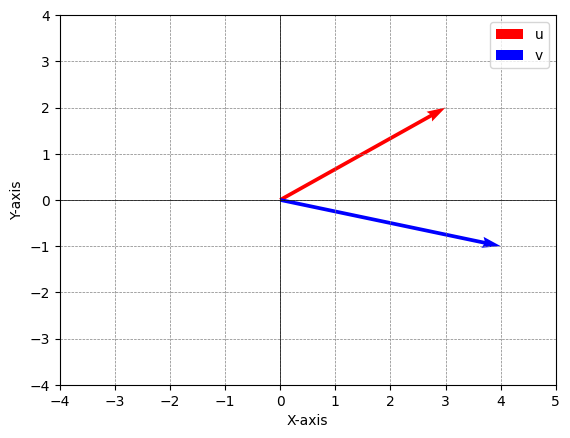

In [79]:
import matplotlib.pyplot as plt
import numpy as np

u = np.array([3, 2])
v = np.array([4, -1])

plt.figure()
plt.quiver(0, 0, u[0], u[1], angles = 'xy', scale_units = 'xy', scale = 1, color = 'r', label = 'u')
plt.quiver(0, 0, v[0], v[1], angles = 'xy', scale_units = 'xy', scale = 1, color = 'b', label = 'v')

plt.xlim(-4, 5)
plt.ylim(-4, 4)
# plt.xlim(-1, 5)
# plt.ylim(-3, 5)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axhline(0, color = 'black',linewidth = 0.5)
plt.axvline(0, color = 'black',linewidth = 0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()

plt.show()

How will we find a set of vectors equivalent to $\vec{u}$ and $\vec{v}$ that are orthogonal to each other?

Recall vector projections.

# Vector Projections

The projection of a vector is defined as the 'shadow' of one vector over another vector. This basically means the part of the vector that 'falls' on other vectors.

The projection of a vector v on the vector u is denoted as:
\begin{align}
  proj_{u}(v) = \frac{\vec{v} \cdot \vec{u}}{\|\vec{u}\|^2} \cdot \vec{u}
\end{align}

In our example, $proj_{u}(v)$ would be equal to:

\begin{align}
  proj_{u}(v) &=
    \frac
    {
      \begin{pmatrix} 4 \\ -1 \end{pmatrix}
      \cdot
      \begin{pmatrix} 3 \\ 2 \end{pmatrix}
    }
    {
      \left\lVert
        \begin{pmatrix} 3 \\ 2 \end{pmatrix}
      \right\rVert ^2
    }
    \cdot
    \begin{pmatrix} 3 \\ 2 \end{pmatrix}
  \\
  &=
  \frac
    {
      (4 \cdot 3) + ((-1) \cdot 2)
    }
    {
      \left\lVert
        \sqrt{(3)^2 + (2)^2}
      \right\rVert ^2
    }
    \cdot
    \begin{pmatrix} 3 \\ 2 \end{pmatrix}
  \\
  &=
  \frac{10}{13}
    \cdot
    \begin{pmatrix} 3 \\ 2 \end{pmatrix}
  \\
  &=
  \begin{pmatrix}
    \frac{30}{13} \\ \frac{20}{13}
  \end{pmatrix}
\end{align}

Here, the projection of $\vec{v}$ on $\vec{u}$, or $proj_{u}(v)$, would be this:

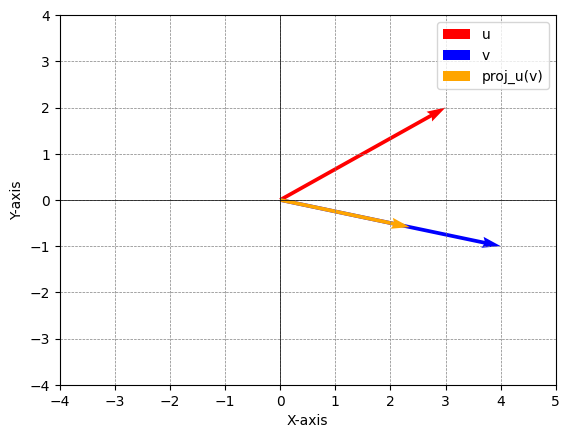

In [80]:
u = np.array([3, 2])
v = np.array([4, -1])
projection_uv = (np.dot(u, v) / np.linalg.norm(v) ** 2) * v

plt.figure()
plt.quiver(0, 0, u[0], u[1], angles = 'xy', scale_units = 'xy', scale = 1, color = 'r', label = 'u')
plt.quiver(0, 0, v[0], v[1], angles = 'xy', scale_units = 'xy', scale = 1, color = 'b', label = 'v')
plt.quiver(0, 0, projection_uv[0], projection_uv[1], angles = 'xy', scale_units = 'xy', scale = 1, color = 'orange', label = 'proj_u(v)')

plt.xlim(-4, 5)
plt.ylim(-4, 4)
# plt.xlim(-1, 5)
# plt.ylim(-3, 5)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axhline(0, color = 'black',linewidth = 0.5)
plt.axvline(0, color = 'black',linewidth = 0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()

plt.show()

Observe the vector $\vec{v} - proj_u(v)$:

\begin{align}
  \vec{v} - proj_u(v) &=
    \begin{pmatrix} 4 \\ -1 \end{pmatrix}
    -
    \begin{pmatrix}
      \frac{30}{13} \\ \frac{20}{13}
    \end{pmatrix}
  \\
  &=
  \begin{pmatrix}
      \frac{22}{13} \\ \frac{-33}{13}
    \end{pmatrix}
\end{align}

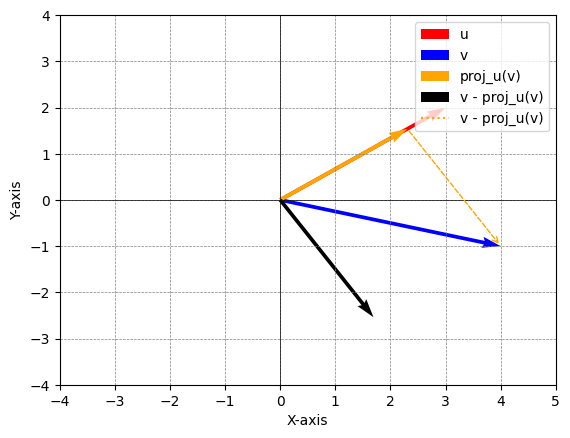

In [81]:
u = np.array([3, 2])
v = np.array([4, -1])
projection_uv = (np.dot(v, u) / np.linalg.norm(u) ** 2) * u
v_minus_projection_uv = v - projection_uv

plt.figure()
plt.quiver(0, 0, u[0], u[1], angles = 'xy', scale_units = 'xy', scale = 1, color = 'r', label = 'u')
plt.quiver(0, 0, v[0], v[1], angles = 'xy', scale_units = 'xy', scale = 1, color = 'b', label = 'v')
plt.quiver(0, 0, projection_uv[0], projection_uv[1], angles = 'xy', scale_units = 'xy', scale = 1, color = 'orange', label = 'proj_u(v)')
# plt.quiver(projection_uv[0], projection_uv[1], v_minus_projection_uv[0], v_minus_projection_uv[1], angles = 'xy', scale_units = 'xy', scale = 1, color = 'orange', label = 'v - proj_v(u)')

plt.quiver(0, 0, v_minus_projection_uv[0], v_minus_projection_uv[1], angles = 'xy', scale_units = 'xy', scale = 1, color = 'black', label = 'v - proj_u(v)')

plt.plot([0, 0], [0, 0], linestyle = 'dotted', color = 'orange', label = 'v - proj_u(v)')
plt.annotate('', xy = (v[0], v[1]), xytext = (projection_uv[0], projection_uv[1]), arrowprops = dict(arrowstyle = '->', linestyle = 'dashed', color = 'orange'))


plt.xlim(-4, 5)
plt.ylim(-4, 4)
# plt.xlim(-1, 5)
# plt.ylim(-3, 5)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axhline(0, color = 'black',linewidth = 0.5)
plt.axvline(0, color = 'black',linewidth = 0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()

plt.show()

Let us now determine the angle between $\vec{u}$ and $\vec{v} - proj_{u}(v)$ using the formulae for the dot product of $\vec{u}$ and $\vec{v} - proj_{u}(v)$:

\begin{align}
  \vec{u} \cdot (\vec{v} - proj_{u}(v)) &=
    \|\vec{u}\|\|(\vec{v} - proj_{u}(v))\|\cos(θ)
  \\
  \begin{pmatrix} 3 \\ 2 \end{pmatrix}
  \cdot
  \begin{pmatrix}
    \frac{22}{13} \\ \frac{-33}{13}
  \end{pmatrix}
  &=
    \left\lVert
      \begin{pmatrix} 3 \\ 2 \end{pmatrix}
    \right\rVert
    \left\lVert
    \begin{pmatrix}
      \frac{22}{13} \\ \frac{-33}{13}
    \end{pmatrix}
    \right\rVert
    \cos(θ)
  \\
  (3 \cdot \frac{22}{13})
  +
  (2 \cdot \frac{-33}{13})
  &=
    \left\lVert
      \sqrt{(3)^2 + (2)^2}
    \right\rVert
    \left\lVert
      \sqrt{(\frac{22}{13})^2 + (\frac{-33}{13})^2}
    \right\rVert
    \cos(θ)
  \\
  0
  &=
  (\sqrt{13})(\frac{11}{\sqrt{13}})\cos(θ)
  \\
  0
  &=
  \cos(θ)
  \\
  90
  &=
  θ
\end{align}

Since $\vec{u} \cdot (\vec{v} - proj_{u}(v)) = 0$ and we see that the angle between $\vec{u}$ and $\vec{v} - proj_{u}(v)$ is 90, we conclude $\vec{u}$ and $\vec{v} - proj_{u}(v)$ are orthogonal to each other.

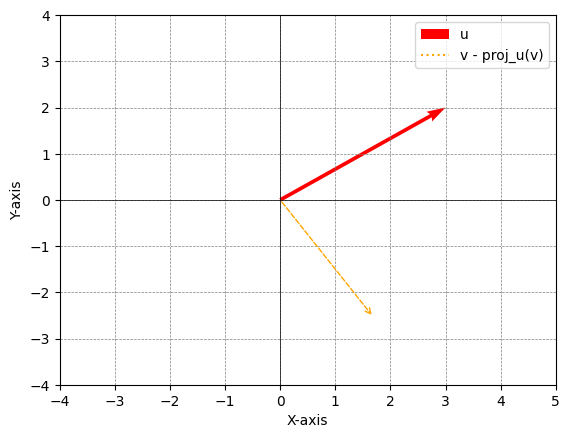

In [82]:
u = np.array([3, 2])
v = np.array([4, -1])
projection_uv = (np.dot(v, u) / np.linalg.norm(u) ** 2) * u
v_minus_projection_uv = v - projection_uv

plt.figure()
plt.quiver(0, 0, u[0], u[1], angles = 'xy', scale_units = 'xy', scale = 1, color = 'r', label = 'u')
# plt.quiver(0, 0, v[0], v[1], angles = 'xy', scale_units = 'xy', scale = 1, color = 'b', label = 'v')
# plt.quiver(0, 0, projection_uv[0], projection_uv[1], angles = 'xy', scale_units = 'xy', scale = 1, color = 'orange', label = 'proj_u(v)')
# plt.quiver(projection_uv[0], projection_uv[1], v_minus_projection_uv[0], v_minus_projection_uv[1], angles = 'xy', scale_units = 'xy', scale = 1, color = 'orange', label = 'v - proj_v(u)')

# plt.quiver(0, 0, v_minus_projection_uv[0], v_minus_projection_uv[1], angles = 'xy', scale_units = 'xy', scale = 1, color = 'black', label = 'v - proj_u(v)')

plt.plot([0, 0], [0, 0], linestyle = 'dotted', color = 'orange', label = 'v - proj_u(v)')
# plt.annotate('', xy = (v[0], v[1]), xytext = (projection_uv[0], projection_uv[1]), arrowprops = dict(arrowstyle = '->', linestyle = 'dashed', color = 'orange'))
plt.annotate('', xy = (v_minus_projection_uv[0], v_minus_projection_uv[1]), xytext = (0, 0), arrowprops = dict(arrowstyle = '->', linestyle = 'dashed', color = 'orange'))

plt.xlim(-4, 5)
plt.ylim(-4, 4)
# plt.xlim(-1, 5)
# plt.ylim(-3, 5)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axhline(0, color = 'black',linewidth = 0.5)
plt.axvline(0, color = 'black',linewidth = 0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()

plt.show()

# NOTE-TO-SELF: Add the v - v_u part explanation here

Now let's suppose you have a set of three vectors $\vec{u}$, $\vec{v}$ and $\vec{w}$ such that $\vec{u}$, $\vec{v}$ and $\vec{w}$ are not orthogonal to each other:

\begin{align}
  \vec{u} = \begin{pmatrix} 3 \\ 2 \end{pmatrix},
  \vec{v} = \begin{pmatrix} 4 \\ -1 \end{pmatrix},
  \vec{w} = \begin{pmatrix} 2 \\ 3 \end{pmatrix}
\end{align}

and

\begin{align}
  \vec{u} \cdot \vec{v} \ne 0 \quad or \quad \vec{u} \cdot \vec{w} \ne 0 \quad or \quad \vec{v} \cdot \vec{w} \ne 0
\end{align}

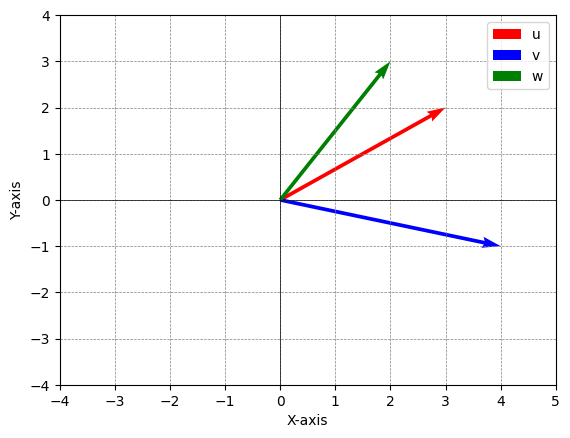

In [83]:
u = np.array([3, 2])
v = np.array([4, -1])
w = np.array([2, 3])

plt.figure()
plt.quiver(0, 0, u[0], u[1], angles = 'xy', scale_units = 'xy', scale = 1, color = 'r', label = 'u')
plt.quiver(0, 0, v[0], v[1], angles = 'xy', scale_units = 'xy', scale = 1, color = 'b', label = 'v')
plt.quiver(0, 0, w[0], w[1], angles = 'xy', scale_units = 'xy', scale = 1, color = 'g', label = 'w')

plt.xlim(-4, 5)
plt.ylim(-4, 4)
# plt.xlim(-1, 5)
# plt.ylim(-3, 5)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axhline(0, color = 'black',linewidth = 0.5)
plt.axvline(0, color = 'black',linewidth = 0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()

plt.show()

We have already found $proj_{v}(u)$ and $\vec{u} - proj_{v}(u)$ in our previous example:

\begin{align}
  proj_{u}(v)
  = \frac{\vec{v} \cdot \vec{u}}{\|\vec{u}\|^2} \cdot \vec{u}
  =
    \frac
    {
      \begin{pmatrix} 4 \\ -1 \end{pmatrix}
      \cdot
      \begin{pmatrix} 3 \\ 2 \end{pmatrix}
    }
    {
      \left\lVert
        \begin{pmatrix} 3 \\ 2 \end{pmatrix}
      \right\rVert ^2
    }
    \cdot
    \begin{pmatrix} 3 \\ 2 \end{pmatrix}
  =
    \begin{pmatrix}
      \frac{30}{13} \\ \frac{20}{13}
    \end{pmatrix}
\end{align}

\begin{align}
  \vec{v} - proj_u(v)
  =
    \begin{pmatrix} 4 \\ -1 \end{pmatrix}
    -
    \begin{pmatrix}
      \frac{30}{13} \\ \frac{20}{13}
    \end{pmatrix}
  =
  \begin{pmatrix}
      \frac{22}{13} \\ \frac{-33}{13}
    \end{pmatrix}
\end{align}

And we have already established that $\vec{u}$ and $\vec{v} - proj_{u}(v)$ are orthogonal to each other:

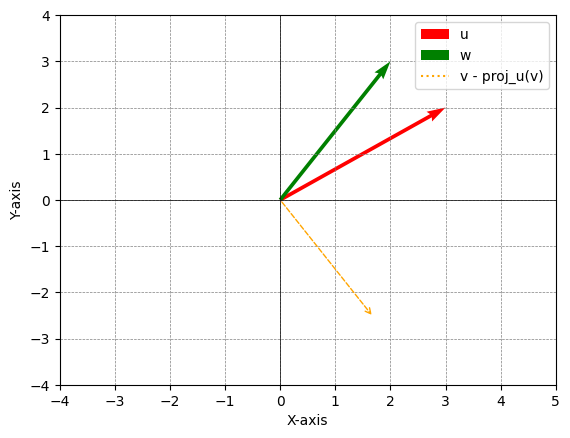

In [84]:
u = np.array([3, 2])
v = np.array([4, -1])
w = np.array([2, 3])
projection_uv = (np.dot(v, u) / np.linalg.norm(u) ** 2) * u
v_minus_projection_uv = v - projection_uv

plt.figure()
plt.quiver(0, 0, u[0], u[1], angles = 'xy', scale_units = 'xy', scale = 1, color = 'r', label = 'u')
# plt.quiver(0, 0, v[0], v[1], angles = 'xy', scale_units = 'xy', scale = 1, color = 'b', label = 'v')
plt.quiver(0, 0, w[0], w[1], angles = 'xy', scale_units = 'xy', scale = 1, color = 'g', label = 'w')
# plt.quiver(0, 0, projection_uv[0], projection_uv[1], angles = 'xy', scale_units = 'xy', scale = 1, color = 'orange', label = 'proj_u(v)')
# plt.plot([0, 0], [0, 0], linestyle = 'dotted', color = 'orange', label = 'u - proj_v(u)')
# plt.annotate('', xy = (u[0], u[1]), xytext = (projection[0], projection[1]), arrowprops = dict(arrowstyle = '->', linestyle = 'dashed', color = 'orange'))
plt.plot([0, 0], [0, 0], linestyle = 'dotted', color = 'orange', label = 'v - proj_u(v)')
# plt.annotate('', xy = (v[0], v[1]), xytext = (projection_uv[0], projection_uv[1]), arrowprops = dict(arrowstyle = '->', linestyle = 'dashed', color = 'orange'))
plt.annotate('', xy = (v_minus_projection_uv[0], v_minus_projection_uv[1]), xytext = (0, 0), arrowprops = dict(arrowstyle = '->', linestyle = 'dashed', color = 'orange'))

plt.xlim(-4, 5)
plt.ylim(-4, 4)
# plt.xlim(-1, 5)
# plt.ylim(-3, 5)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axhline(0, color = 'black',linewidth = 0.5)
plt.axvline(0, color = 'black',linewidth = 0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()

plt.show()

We now need to find a vector that is orthogonal to both $\vec{u}$ and $\vec{v} - proj_{u}(v)$, and $\vec{w}$.

Let us begin by calculating $proj_{u}(w)$ and $\vec{w} - proj_{u}(w)$ as before:

\begin{align}
  proj_{u}(w)
  = \frac{\vec{w} \cdot \vec{u}}{\|\vec{u}\|^2} \cdot \vec{u}
  =
    \frac
    {
      \begin{pmatrix} 2 \\ 3 \end{pmatrix}
      \cdot
      \begin{pmatrix} 3 \\ 2 \end{pmatrix}
    }
    {
      \left\lVert
        \begin{pmatrix} 3 \\ 2 \end{pmatrix}
      \right\rVert ^2
    }
    \cdot
    \begin{pmatrix} 3 \\ 2 \end{pmatrix}
  =
    \begin{pmatrix}
      \frac{36}{13} \\ \frac{24}{13}
    \end{pmatrix}
\end{align}

\begin{align}
  \vec{w} - proj_u(w)
  =
    \begin{pmatrix} 2 \\ 3 \end{pmatrix}
    -
    \begin{pmatrix}
      \frac{36}{13} \\ \frac{24}{13}
    \end{pmatrix}
  =
  \begin{pmatrix}
      \frac{-10}{13} \\ \frac{15}{13}
    \end{pmatrix}
\end{align}

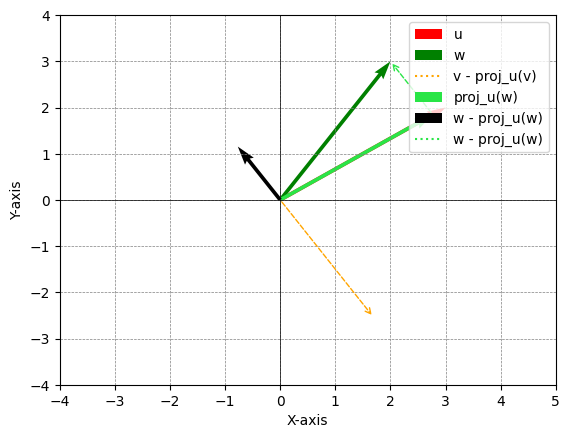

In [85]:
u = np.array([3, 2])
v = np.array([4, -1])
w = np.array([2, 3])
projection_uv = (np.dot(v, u) / np.linalg.norm(u) ** 2) * u
v_minus_projection_uv = v - projection_uv
projection_uw = (np.dot(w, u) / np.linalg.norm(u) ** 2) * u
w_minus_projection_uw = w - projection_uw

plt.figure()
plt.quiver(0, 0, u[0], u[1], angles = 'xy', scale_units = 'xy', scale = 1, color = 'r', label = 'u')
# plt.quiver(0, 0, v[0], v[1], angles = 'xy', scale_units = 'xy', scale = 1, color = 'b', label = 'v')
plt.quiver(0, 0, w[0], w[1], angles = 'xy', scale_units = 'xy', scale = 1, color = 'g', label = 'w')
# plt.quiver(0, 0, projection_uv[0], projection_uv[1], angles = 'xy', scale_units = 'xy', scale = 1, color = 'orange', label = 'proj_u(v)')
# plt.plot([0, 0], [0, 0], linestyle = 'dotted', color = 'orange', label = 'u - proj_v(u)')
# plt.annotate('', xy = (u[0], u[1]), xytext = (projection[0], projection[1]), arrowprops = dict(arrowstyle = '->', linestyle = 'dashed', color = 'orange'))
plt.plot([0, 0], [0, 0], linestyle = 'dotted', color = 'orange', label = 'v - proj_u(v)')
# plt.annotate('', xy = (v[0], v[1]), xytext = (projection_uv[0], projection_uv[1]), arrowprops = dict(arrowstyle = '->', linestyle = 'dashed', color = 'orange'))
plt.annotate('', xy = (v_minus_projection_uv[0], v_minus_projection_uv[1]), xytext = (0, 0), arrowprops = dict(arrowstyle = '->', linestyle = 'dashed', color = 'orange'))

plt.quiver(0, 0, projection_uw[0], projection_uw[1], angles = 'xy', scale_units = 'xy', scale = 1, color = '#29E546', label = 'proj_u(w)')
plt.quiver(0, 0, w_minus_projection_uw[0], w_minus_projection_uw[1], angles = 'xy', scale_units = 'xy', scale = 1, color = 'black', label = 'w - proj_u(w)')
plt.plot([0, 0], [0, 0], linestyle = 'dotted', color = '#29E546', label = 'w - proj_u(w)')
plt.annotate('', xy = (w[0], w[1]), xytext = (projection_uw[0], projection_uw[1]), arrowprops = dict(arrowstyle = '->', linestyle = 'dashed', color = '#29E546'))

plt.xlim(-4, 5)
plt.ylim(-4, 4)
# plt.xlim(-1, 5)
# plt.ylim(-3, 5)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axhline(0, color = 'black',linewidth = 0.5)
plt.axvline(0, color = 'black',linewidth = 0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()

plt.show()

Given our previous calculations, we know that $\vec{w} - proj_u(w)$ will be orthogonal to $\vec{u}$, but it is still not orthogonal to $\vec{v} - proj_{u}(v)$.

So, we calculate the projection of $\vec{w}$ on $\vec{v} - proj_{u}(v)$:

\begin{align}
  proj_{\vec{v} - proj_{u}(v)}(w)
  = \frac
  { \vec{w} \cdot (\vec{v} - proj_{u}(v))}
  { \| \vec{v} - proj_{u}(v) \| ^2}
  \cdot
  (\vec{v} - proj_{u}(v))
  =
    \frac
    {
      \begin{pmatrix} 2 \\ 3 \end{pmatrix}
      \cdot
      \begin{pmatrix}
        \frac{22}{13} \\ \frac{-33}{13}
      \end{pmatrix}
    }
    {
      \left\lVert
        \begin{pmatrix}
          \frac{22}{13} \\ \frac{-33}{13}
        \end{pmatrix}
      \right\rVert ^2
    }
    \cdot
    \begin{pmatrix}
      \frac{22}{13} \\ \frac{-33}{13}
    \end{pmatrix}
  =
    \begin{pmatrix}
      \frac{-10}{13} \\ \frac{15}{13}
    \end{pmatrix}
\end{align}


\begin{align}
  \vec{w} - proj_{u}(w) - proj_{\vec{v} - proj_{u}(v)}(w)
  =
\end{align}

u1 = u,

u2 = v - proj_u(v),

u3 = w - proj_u(w) - proj_(v - proj_u(v))(w)

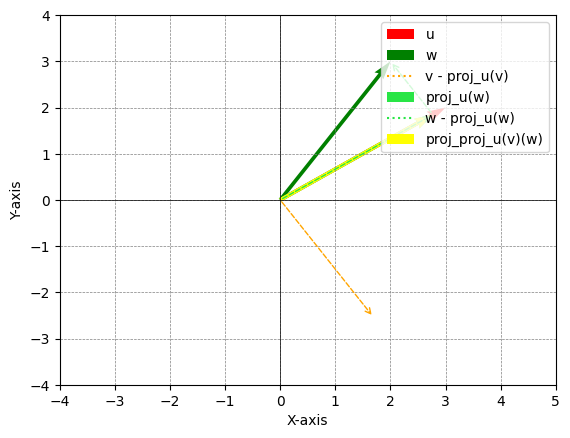

In [86]:
u = np.array([3, 2])
v = np.array([4, -1])
w = np.array([2, 3])
projection_uv = (np.dot(v, u) / np.linalg.norm(u) ** 2) * u
v_minus_projection_uv = v - projection_uv
projection_uw = (np.dot(w, u) / np.linalg.norm(u) ** 2) * u
w_minus_projection_uw = w - projection_uw
projection_projection_uv_w = (np.dot(w, projection_uv) / np.linalg.norm(projection_uv) ** 2) * projection_uv

plt.figure()
plt.quiver(0, 0, u[0], u[1], angles = 'xy', scale_units = 'xy', scale = 1, color = 'r', label = 'u')
plt.quiver(0, 0, w[0], w[1], angles = 'xy', scale_units = 'xy', scale = 1, color = 'g', label = 'w')
plt.plot([0, 0], [0, 0], linestyle = 'dotted', color = 'orange', label = 'v - proj_u(v)')
plt.annotate('', xy = (v_minus_projection_uv[0], v_minus_projection_uv[1]), xytext = (0, 0), arrowprops = dict(arrowstyle = '->', linestyle = 'dashed', color = 'orange'))


plt.quiver(0, 0, projection_uw[0], projection_uw[1], angles = 'xy', scale_units = 'xy', scale = 1, color = '#29E546', label = 'proj_u(w)')
# plt.quiver(0, 0, w_minus_projection_uw[0], w_minus_projection_uw[1], angles = 'xy', scale_units = 'xy', scale = 1, color = 'black', label = 'w - proj_u(w)')
plt.plot([0, 0], [0, 0], linestyle = 'dotted', color = '#29E546', label = 'w - proj_u(w)')
plt.annotate('', xy = (w[0], w[1]), xytext = (projection_uw[0], projection_uw[1]), arrowprops = dict(arrowstyle = '->', linestyle = 'dashed', color = '#29E546'))
plt.annotate('', xy = (projection_projection_uv_w[0], projection_projection_uv_w[1]), xytext = (0, 0), arrowprops = dict(arrowstyle = '->', linestyle = 'dashed', color = '#29E546'))


plt.quiver(0, 0, projection_projection_uv_w[0], projection_projection_uv_w[1], angles = 'xy', scale_units = 'xy', scale = 1, color = 'yellow', label = 'proj_proj_u(v)(w)')
# plt.annotate('', xy = (w[0], w[1]), xytext = (projection_projection_uv_w[0], projection_projection_uv_w[1]), arrowprops = dict(arrowstyle = '->', linestyle = 'dashed', color = 'yellow'))

plt.xlim(-4, 5)
plt.ylim(-4, 4)
# plt.xlim(-1, 5)
# plt.ylim(-3, 5)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axhline(0, color = 'black',linewidth = 0.5)
plt.axvline(0, color = 'black',linewidth = 0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()

plt.show()

# Gram-Schmidt Algorithm

Given a set of vectors, output an equivalent set of vectors which are orthogonal to each other.